<a href="https://colab.research.google.com/github/ShrutiPandey27/machine_learning_practice/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#k-means algorithm


X={x1,x2,x3,.....,xn}
v={v1,v2,v3,....,vn}

1.first we need to select 'c' number of clusters.Randomly select 'c' cluster centers.

2.calculate the distance between each data point and cluster centers.

3.assign the data point to the cluster whose distancce ftom the cluster center is minimum of all the clusters centers.

4.recalculate the new cluster center 

repeat till we get non changing value of c




In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [3]:
df=pd.DataFrame({
    'x1':[12,23,45,32,45,23,32,45,23,56,23,56],
    'x2':[34,55,54,76,87,93,67,43,87,23,76,23]
})
df

,x1,x2
0,12,34
1,23,55
2,45,54
3,32,76
4,45,87
5,23,93
6,32,67
7,45,43
8,23,87
9,56,23


In [4]:
from sklearn.cluster import KMeans
X=df
X.head()

,x1,x2
0,12,34
1,23,55
2,45,54
3,32,76
4,45,87


In [8]:
km=KMeans(n_clusters=2)  #clusters

In [10]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
km.cluster_centers_

array([[28.71428571, 77.28571429],
       [42.8       , 35.4       ]])

In [12]:
km.labels_

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

In [13]:
#in actual dataframe in front of corresponding data point we will put its label
df['k mean predicted label']=km.labels_
df.head()

,x1,x2,k mean predicted label
0,12,34,1
1,23,55,0
2,45,54,1
3,32,76,0
4,45,87,0


In [14]:
labels=km.labels_
labels

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

In [17]:
df.size

36

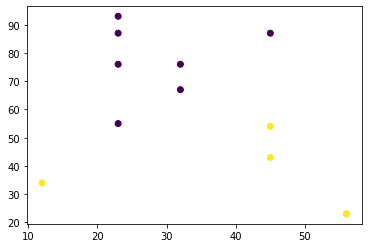

In [19]:
#visualization

plt.scatter(df['x1'],df['x2'],36,labels)
plt.show()



#x1,x2,x3,x4,x5....xn for more than 2 features you need to pick any of 2 features to plotting graph

#plt.scatter (df['x1'],df['x4'])

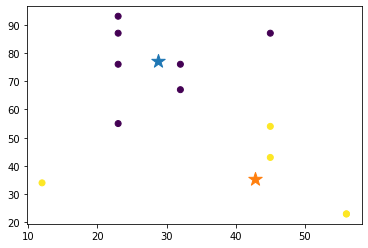

In [22]:
#plot centroid points

#here we make use of for loop for plotting centroid because km is 2 dimensional so and 200 here represnts the size of centroid mark

plt.scatter(df['x1'],df['x2'],36,labels)
for i in km.cluster_centers_:
  plt.scatter(i[0],i[1],200,marker='*')
plt.show()


**elbow method**



wss --->methodology

used for finding optimal no of clusters


graph of distortion v/s no of clusters--------->gives best no of clusters.

---



In [23]:
wss=[]
cluster_range=range(1,10)

for k in cluster_range:
  km=KMeans(n_clusters=k)
  km.fit(X)
  inertia=km.inertia_
  wss.append(inertia)


wss

[9177.5,
 3478.8571428571427,
 1954.5833333333333,
 1183.3333333333335,
 772.5999999999999,
 447.75,
 186.5,
 119.0,
 58.5]

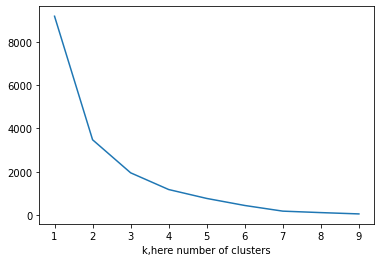

In [24]:
plt.xlabel('k,here number of clusters')
plt.ylabel=('sum of squared error')

plt.plot(cluster_range,wss)